# 1. Introduction
### Main goal:
To comprehend sales patterns, customer behaviors, and seasonal trends from a specific dataset.

### Content:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# 2. Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('data.csv', encoding='latin-1')

# 3. Data Exploration
### We verify the following:
The 'InvoiceDate' column needs to be changed from string type to datetime objects (we change this later during data cleaning). How many zero values and missing values we have.

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Display missing values

In [5]:
# Show columns containing at least one value of 0 (zero).
df.columns[df.isin([0]).any()]

Index(['UnitPrice'], dtype='object')

In [6]:
# Show columns containing at least one missing value (NaN)
df.columns[df.isna().any()]

Index(['Description', 'CustomerID'], dtype='object')

In [7]:
# Method to display the number of missing values (NaN) in each column of the DataFrame
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# 4. Data Cleaning
### 4.1 Replace values of 0 with the mean

In [8]:
# Calculate the mean of 'UnitPrice'
unit_price_mean = df['UnitPrice'].mean()

# Replace values of 0 with the mean
df['UnitPrice'] = df['UnitPrice'].replace(0, unit_price_mean)

### 4.2 Fill missing values in the 'Description' column with a predetermined text

In [9]:
df['Description'].fillna('No description available')

# Show how many missing values remain in each column of the DataFrame
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 4.3 Replace missing value in 'CustomerID'
Replace with text that identifies the associated customer in the corresponding row of 'InvoiceNo'

In [10]:
# Function to replace NaN in CustomerID with custom text
def fill_customer_id(row):
    if pd.isna(row['CustomerID']):
        return f"Customer of Invoice Nº {row['InvoiceNo']}"
    else:
        return row['CustomerID']
    
# Apply the function to each row
df['CustomerID'] = df.apply(fill_customer_id, axis=1)

# Show how many missing values remain in each column of the DataFrame
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

### 4.4 Change the 'InvoiceDate' column to datetime objects

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Display and review the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


# 5. Sales and Product Analysis
### Sales by product categories
The best-selling products include "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "JUMBO BAG RED RETROSPOT". These items represent popular products that should be kept in inventory due to their high demand.

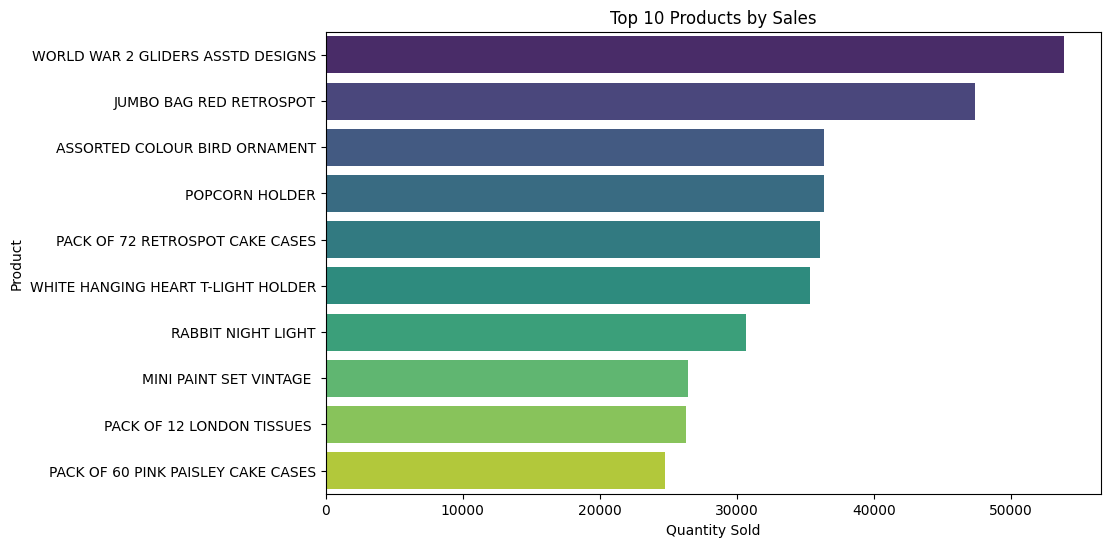

In [12]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, hue=sales_by_product.index, palette='viridis', legend=False)

plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Products by Sales')
plt.show()

### Revenue Analysis by Products
The products that generate the highest revenue are "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER". These items not only have high sales volumes but also contribute significantly to the store's total revenue.

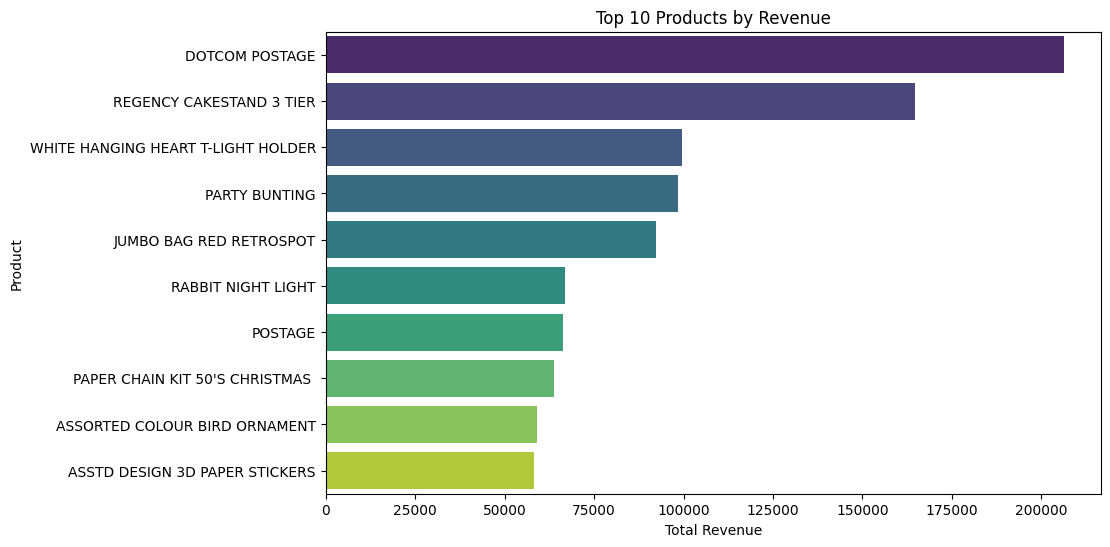

In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, hue=top_revenue_products.index, palette='viridis', legend=False)
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Products by Revenue')
plt.show()

# 6. Customer Analysis
### Wholesale Customer Profile (RFM Analysis)
Based on RFM analysis, different customer segments are identified:
- Most recent customer: Has a recency of 2 days, indicating high recent activity.
- Purchase Frequency: The average purchase frequency is approximately 3 times, with some customers making up to 248 purchases, highlighting loyalty and recurrent buying activity.
- Monetary Value: Monetary value varies significantly, from customers with very low spending to those with large purchases, such as £4,310.

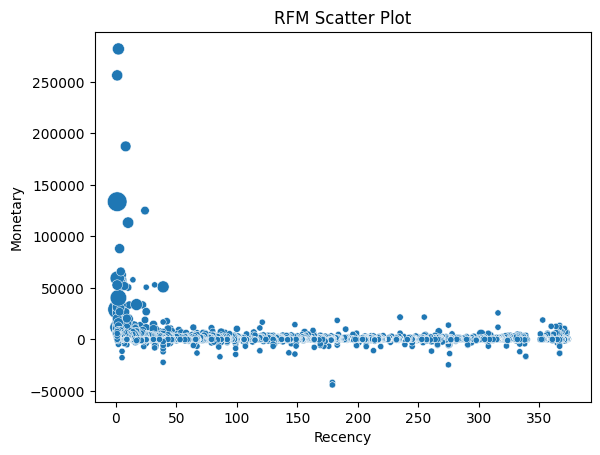

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
8077,Customer of Invoice Nº C578097,17,1,-1208.04
8078,Customer of Invoice Nº C579757,9,1,-15.60
8079,Customer of Invoice Nº C579907,9,1,-15.30
8080,Customer of Invoice Nº C580604,5,1,-11586.50


In [14]:
# Reference date for calculating recency
reference_date = df['InvoiceDate'].max() + timedelta(days=1)

# Calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# RFM Visualization
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', data=rfm, legend=False, sizes=(20, 200))
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('RFM Scatter Plot')
plt.show()

rfm

### Purchase Patterns and frequency
Most customers make between 1 and 3 purchases, with an average of 3.2 purchases per customer. This suggests a diverse customer base in terms of purchase frequency.

In [15]:
customer_purchase_pattern = df.groupby('CustomerID')['InvoiceNo'].nunique().describe()
customer_purchase_pattern

count    8082.000000
mean        3.204652
std         7.162265
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       248.000000
Name: InvoiceNo, dtype: float64

# 7. Sales Analysis by Countries
The United Kingdom leads in sales, followed by the Netherlands and EIRE. These data highlight the importance of the domestic market and potential opportunities in key international markets.

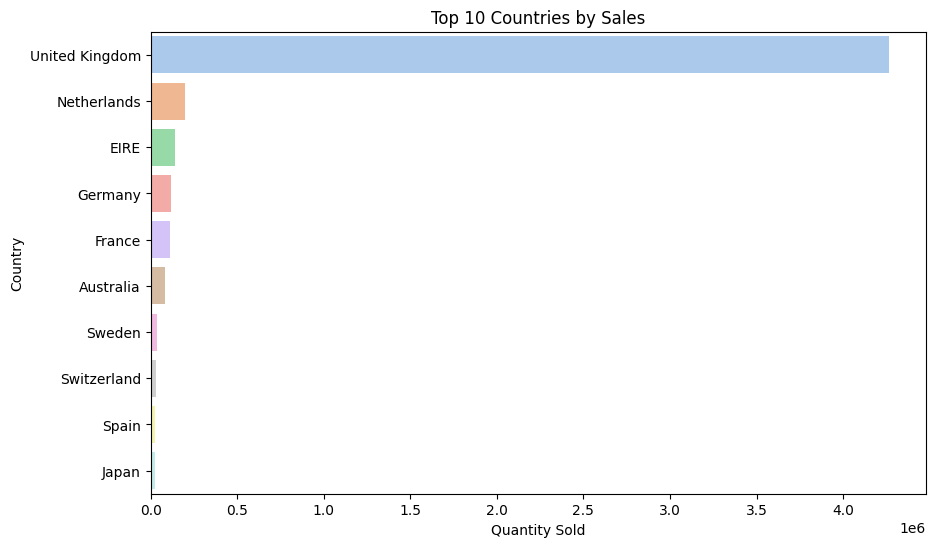

In [16]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, hue=sales_by_country.index, palette='pastel', legend=False)
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')
plt.show()

# 8. Trends and Seasonalities
### Temporal Sales Analysis (Monthly)
Monthly sales show a seasonal pattern with significant peaks from September to November. These peaks can be attributed to events such as holidays or successful promotional campaigns.

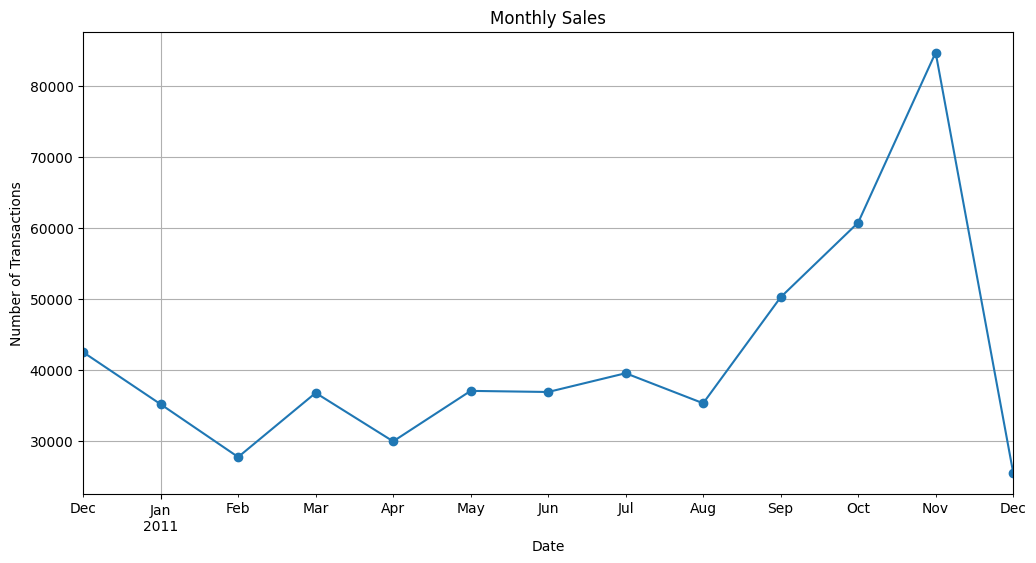

In [17]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales')
plt.grid(True)
plt.show()

### Sales by Day of the Week
Sales show a relatively even distribution throughout the week, with a slight decrease on Fridays and Saturdays. This suggests that marketing and promotion strategies should consider adjustments to boost sales on these days.

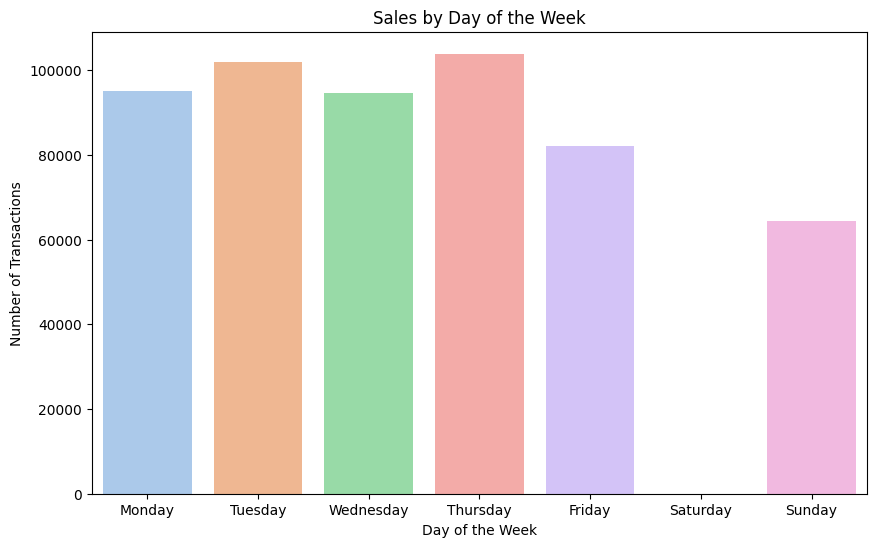

In [18]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, hue=weekday_sales.index, palette='pastel', legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Sales by Day of the Week')
plt.show()

### Sales by Hour of the Day
Peak sales hours are observed between 9:00 AM and 3:00 PM, with a peak at 12:00 PM. This pattern indicates optimal times to implement promotional strategies and efficiently manage resources during periods of high demand.

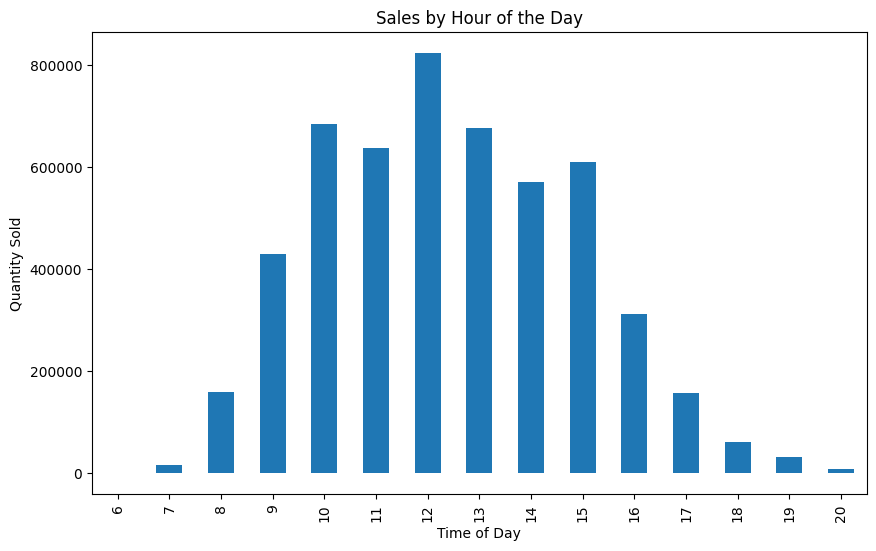

In [19]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.title('Sales by Hour of the Day')
plt.show()